In [1]:
import pandas as pd
import numpy as np

In [2]:

# Lấy dữ liệu từ Google Sheets
sheet_url = "https://docs.google.com/spreadsheets/d/1XEFg047aSbg3OsEVx9PzmgSxGbCvCidfLiHfsgRS3R0/export?format=csv"
df_google = pd.read_csv(sheet_url)

df_google



,Prefecture Patient Number,City Patient Number,Date Announced,Date Added,Age Bracket,Gender,"Residence City, Prefecture",Detected City,Detected Prefecture,Status,Notes,Source(s),Related Patients,Known Cluster,Deceased,MHLW (Orig) Patient Number,Charter Flight Passenger,Cruise Passenger (Disembarked),Has ID,Prefecture URL (Auto)
0,1,NaN,2020-01-30,2020-01-30,50,M,"Wuhan, China",NaN,Unspecified,Discharged,Japanese lives in China,https://www.mhlw.go.jp/stf/newpage_09531.html,NaN,Charter Flight,NaN,9,1.0,NaN,0.0,NaN
1,2,NaN,2020-02-01,2020-02-01,40,M,Unspecified,NaN,Unspecified,Discharged,NaN,https://www.mhlw.go.jp/stf/newpage_09531.html,3,Charter Flight,NaN,14,1.0,NaN,0.0,NaN
2,3,NaN,2020-02-01,2020-02-01,40,M,China,NaN,Unspecified,Discharged,Japanese lives in China,https://www.mhlw.go.jp/stf/newpage_09531.html,2,Charter Flight,NaN,15,1.0,NaN,0.0,NaN
3,4,Chiba#2,2020-02-01,2020-02-01,40,M,"Wuhan, China",NaN,Chiba,Discharged,Japanese lives in China,https://www.mhlw.go.jp/stf/newpage_09531.html,NaN,Charter Flight,NaN,16,1.0,NaN,2.0,NaN
4,5,ChibaAsymp#1,2020-01-30,2020-02-04,50,F,Chiba,NaN,Chiba,Discharged,NaN,https://www.mhlw.go.jp/stf/newpage_09531.html,NaN,Charter Flight,NaN,18,1.0,NaN,1.0,https://www.mhlw.go.jp/stf/newpage_09531.html
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7001,9101,Hyogo#646,2020-04-30,2020-04-30,50,F,Amagasaki,NaN,Hyogo,NaN,NaN,http://web.pref.hyogo.lg.jp/kk03/corona_hassei...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7002,9102,NaN,2020-04-30,2020-04-30,NaN,NaN,Funabashi,NaN,Chiba,NaN,NaN,https://www3.nhk.or.jp/news/html/20200430/k100...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7003,9103,NaN,2020-04-30,2020-04-30,NaN,NaN,Funabashi,NaN,Chiba,NaN,NaN,https://www3.nhk.or.jp/news/html/20200430/k100...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7004,9104,NaN,2020-04-30,2020-04-30,NaN,NaN,Funabashi,NaN,Chiba,NaN,NaN,https://www3.nhk.or.jp/news/html/20200430/k100...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Số ca nhiễm theo từng thành phố

In [27]:
# Chuyển đổi các giá trị không phải số thành NaN, sau đó thay NaN bằng 0
df_google['MHLW (Orig) Patient Number'] = pd.to_numeric(df_google['MHLW (Orig) Patient Number'], errors='coerce').fillna(0)

# Chuyển kiểu dữ liệu về int
df_google['MHLW (Orig) Patient Number'] = df_google['MHLW (Orig) Patient Number'].astype(int)

# Tính tổng số ca bệnh theo thành phố
case_by_city = df_google[['Residence City, Prefecture', 'MHLW (Orig) Patient Number']].groupby('Residence City, Prefecture').sum().reset_index()


# tính số ca bệnh theo tuổi

In [ ]:

# Lấy danh sách các giá trị duy nhất trong cột 'Age Bracket'
df_google['Age Bracket'].unique()

# Chuyển đổi các giá trị không phải số thành NaN, sau đó thay NaN bằng 0
df_google['Age Bracket'] = pd.to_numeric(df_google['Age Bracket'], errors='coerce').fillna('other')

# Tổng số ca nhiễm theo tuổi
case_by_age = df_google[['Age Bracket', 'MHLW (Orig) Patient Number']].groupby('Age Bracket').sum().reset_index()
case_by_age

,Age Bracket,MHLW (Orig) Patient Number
0,0.0,986
1,10.0,522
2,20.0,2932
3,30.0,4322
4,40.0,6904
5,50.0,7849
6,60.0,12199
7,70.0,4413
8,80.0,3212
9,90.0,367


In [40]:
df_google['Age Bracket'].unique()

array([50.0, 40.0, 20.0, 0.0, 60.0, 'other', 30.0, 70.0, 80.0, 10.0, 90.0,
       100.0], dtype=object)

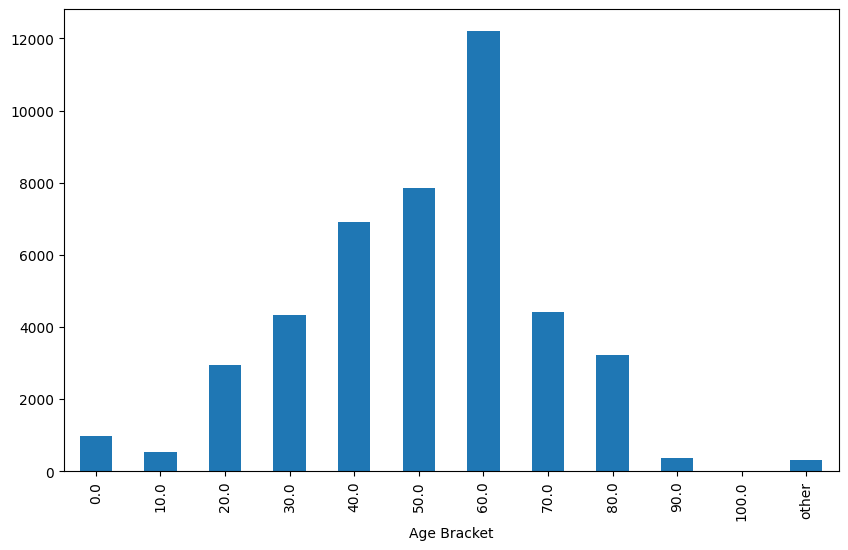

In [43]:
plot = case_by_age.plot(x='Age Bracket', y='MHLW (Orig) Patient Number', kind='bar', figsize=(10, 6), legend=False)

c. Liệt kê số ca nhiễm tại Hokkaido theo từng ngày. Vẽ biểu đồ. 

In [30]:
df_google['Residence City, Prefecture'].unique()

array(['Wuhan, China', 'Unspecified', 'China', 'Chiba', 'Saitama', nan,
       'Nara', 'Mie', 'Kyoto', 'Hubei, China', 'Kanagawa', 'Wakayama',
       'Ichikawa', 'Okinawa', 'Sapporo', 'Tokyo', 'Hokkaido', 'Fukuoka',
       'Kashiwa', 'Nakafurano', 'Chitose, Ishikari', 'Ishikawa',
       'Kumamoto', 'Iburi', 'Nemuro', 'Asahikawa', 'Ebetsu', 'Hakodate',
       'Shiriuchi, Oshima', 'Kitami', 'Tochigi', 'Kamikawa',
       'Biei, Kamikawa', 'Kushiro', 'Ishikari', 'Matsudo', 'Okhotsk',
       'Nagano', 'Aizumi', 'Hidaka', 'Isumishi', 'Yotsukaido', 'Kanazawa',
       'Osaka', 'Matsumoto', 'Ogaki', 'Shiga', 'Sorachi', 'Tokachi',
       'Hiyama', 'Oshima', 'Sorachiso', 'Shizuoka', 'Kochi', 'Sendai',
       'Tomakomai', 'Funabashi', 'Kita-Kyushu', 'Nishinomiya', 'Ainan',
       'Kitami, Okhotsk', 'Kamo', 'Niigata', 'Oita, Oita', 'Hyogo',
       'Kyoto city', 'Shimonoseki', 'Ehime', 'Miyazaki',
       'Arao and Tamana (both)', 'Fukusaki', 'Gyoda', 'Ageo', 'Okayama',
       'Nanmoku-mura', 'Yamash

In [31]:
# Lọc dữ liệu theo tỉnh Hokkaido
hokkaido_cases = df_google.loc[df_google['Residence City, Prefecture'].str.contains('Hokkaido', case=False, na=False)]

#chuyen đổi kiểu dữ liệu của cột 'Date Announced' về datetime
hokkaido_cases['Date Announced'] = pd.to_datetime(hokkaido_cases['Date Announced'], errors='coerce')

# chuyển số lượng bệnh nhân về kiểu int
hokkaido_cases['MHLW (Orig) Patient Number'] = pd.to_numeric(hokkaido_cases['MHLW (Orig) Patient Number'], errors='coerce').fillna(0).astype(int)
patients_by_day_sum = hokkaido_cases.groupby('Date Announced')['MHLW (Orig) Patient Number'].sum().reset_index(name='Patient Count')

patients_by_day_sum


C:\Users\Windows\AppData\Local\Temp\ipykernel_45952\1505267100.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hokkaido_cases['Date Announced'] = pd.to_datetime(hokkaido_cases['Date Announced'], errors='coerce')
C:\Users\Windows\AppData\Local\Temp\ipykernel_45952\1505267100.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hokkaido_cases['MHLW (Orig) Patient Number'] = pd.to_numeric(hokkaido_cases['MHLW (Orig) Patient Number'], errors='coerce').fillna(0).astype(int)


,Date Announced,Patient Count
0,2020-02-19,64
1,2020-03-04,533
2,2020-03-06,972
3,2020-03-07,372
4,2020-03-08,1230
5,2020-03-10,0
6,2020-03-24,0
7,2020-03-25,0
8,2020-04-11,0


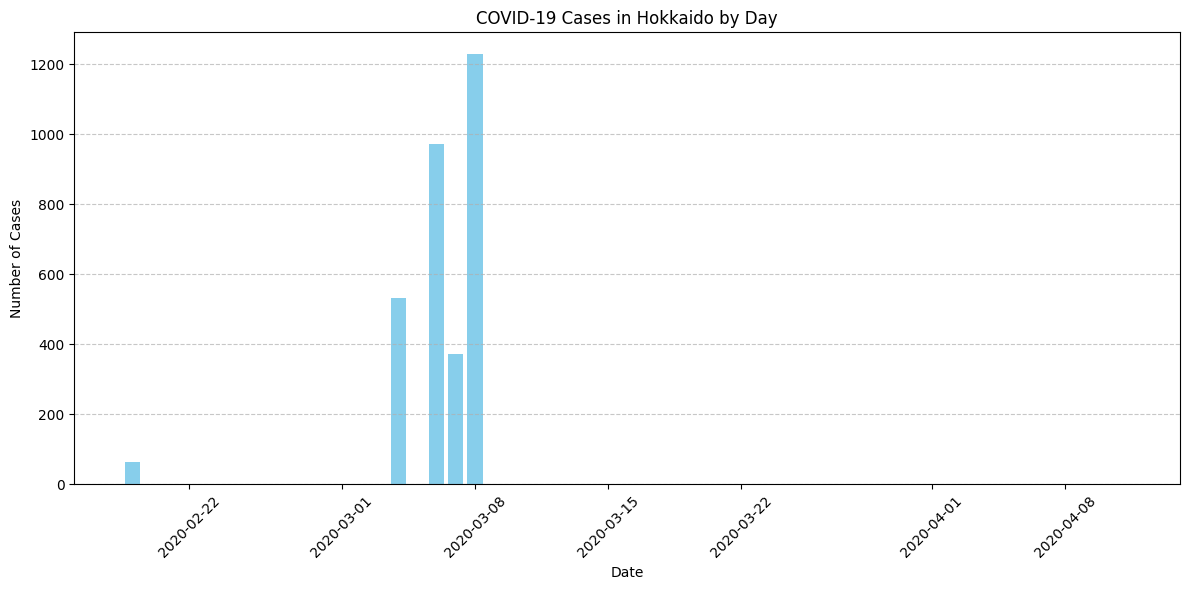

In [32]:
# Step 4: Visualize cases in Hokkaido by day
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(patients_by_day_sum['Date Announced'], patients_by_day_sum['Patient Count'], color='skyblue')
plt.title('COVID-19 Cases in Hokkaido by Day')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()